In [1]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML tools
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

import joblib
import shap

In [2]:
# Load dataset
df = pd.read_csv("../dataset/dataset.csv")  
df = df.dropna(subset=["price"]).reset_index(drop=True)

pd.set_option("display.max_columns", None)
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (979, 17)


name  \
0     2024 Jeep Wagoneer Series II   
1  2024 Jeep Grand Cherokee Laredo   
2         2024 GMC Yukon XL Denali   
3       2023 Dodge Durango Pursuit   
4            2024 RAM 3500 Laramie   

                                         description   make           model  \
0  \n      \n        Heated Leather Seats, Nav Sy...   Jeep        Wagoneer   
1  Al West is committed to offering every custome...   Jeep  Grand Cherokee   
2                                                NaN    GMC        Yukon XL   
3  White Knuckle Clearcoat 2023 Dodge Durango Pur...  Dodge         Durango   
4  \n      \n        2024 Ram 3500 Laramie Billet...    RAM            3500   

   year    price                                             engine  \
0  2024  74600.0                            24V GDI DOHC Twin Turbo   
1  2024  50170.0                                                OHV   
2  2024  96410.0  6.2L V-8 gasoline direct injection, variable v...   
3  2023  46835.0                                       16V MPFI OHV   
4  2024  81663.0                           24V DDI OHV Turbo Diesel   

   cylinders      fuel  mileage       transmission       trim          body  \
0        6.0  Gasoline     10.0  8-Speed Automatic  Series II           SUV   
1        6.0  Gasoline      1.0  8-Speed Automatic     Laredo           SUV   
2        8.0  Gasoline      0.0          Automatic     Denali           SUV   
3        8.0  Gasoline     32.0  8-Speed Automatic    Pursuit           SUV   
4        6.0    Diesel     10.0  6-Speed Automatic    Laramie  Pickup Truck   

   doors           exterior_color    interior_color        drivetrain  
0    4.0                    White      Global Black  Four-wheel Drive  
1    4.0                 Metallic      Global Black  Four-wheel Drive  
2    4.0             Summit White  Teak/Light Shale  Four-wheel Drive  
3    4.0  White Knuckle Clearcoat             Black   All-wheel Drive  
4    4.0                   Silver             Black  Four-wheel Drive

In [3]:
print(df.info())
display(df.describe(include="all"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            979 non-null    object 
 1   description     923 non-null    object 
 2   make            979 non-null    object 
 3   model           979 non-null    object 
 4   year            979 non-null    int64  
 5   price           979 non-null    float64
 6   engine          977 non-null    object 
 7   cylinders       877 non-null    float64
 8   fuel            972 non-null    object 
 9   mileage         945 non-null    float64
 10  transmission    977 non-null    object 
 11  trim            978 non-null    object 
 12  body            976 non-null    object 
 13  doors           972 non-null    float64
 14  exterior_color  974 non-null    object 
 15  interior_color  942 non-null    object 
 16  drivetrain      979 non-null    object 
dtypes: float64(4), int64(1), object(12)

name                        description  make  \
count                          979                                923   979   
unique                         354                                740    28   
top     2023 Dodge Durango Pursuit  \n      \n        .\n      \n      Jeep   
freq                            33                                 13   192   
mean                           NaN                                NaN   NaN   
std                            NaN                                NaN   NaN   
min                            NaN                                NaN   NaN   
25%                            NaN                                NaN   NaN   
50%                            NaN                                NaN   NaN   
75%                            NaN                                NaN   NaN   
max                            NaN                                NaN   NaN   

         model         year          price              engine   cylinders  \
count      979   979.000000     979.000000                 977  877.000000   
unique     151          NaN            NaN                 100         NaN   
top     Hornet          NaN            NaN  16V GDI DOHC Turbo         NaN   
freq        61          NaN            NaN                 120         NaN   
mean       NaN  2023.916241   50202.985700                 NaN    4.977195   
std        NaN     0.298482   18700.392062                 NaN    1.393701   
min        NaN  2023.000000       0.000000                 NaN    0.000000   
25%        NaN  2024.000000   36600.000000                 NaN    4.000000   
50%        NaN  2024.000000   47165.000000                 NaN    4.000000   
75%        NaN  2024.000000   58919.500000                 NaN    6.000000   
max        NaN  2025.000000  195895.000000                 NaN    8.000000   

            fuel      mileage       transmission     trim body       doors  \
count        972   945.000000                977      978  976  972.000000   
unique         7          NaN                 38      197    8         NaN   
top     Gasoline          NaN  8-Speed Automatic  Limited  SUV         NaN   
freq         647          NaN                312       68  690         NaN   
mean         NaN    67.348148                NaN      NaN  NaN    3.944444   
std          NaN   510.839452                NaN      NaN  NaN    0.270408   
min          NaN     0.000000                NaN      NaN  NaN    2.000000   
25%          NaN     4.000000                NaN      NaN  NaN    4.000000   
50%          NaN     8.000000                NaN      NaN  NaN    4.000000   
75%          NaN    13.000000                NaN      NaN  NaN    4.000000   
max          NaN  9711.000000                NaN      NaN  NaN    5.000000   

                exterior_color interior_color       drivetrain  
count                      974            942              979  
unique                     262             90                4  
top     Bright White Clearcoat          Black  All-wheel Drive  
freq                        80            497              445  
mean                       NaN            NaN              NaN  
std                        NaN            NaN              NaN  
min                        NaN            NaN              NaN  
25%                        NaN            NaN              NaN  
50%                        NaN            NaN              NaN  
75%                        NaN            NaN              NaN  
max                        NaN            NaN              NaN

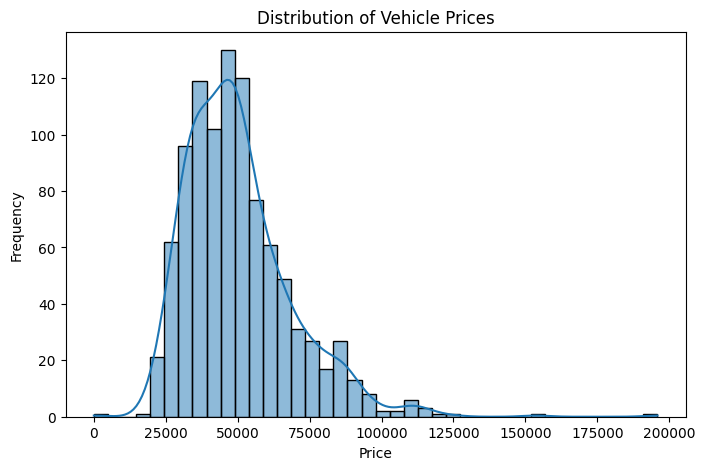

In [4]:
# Price Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["price"], bins=40, kde=True)
plt.title("Distribution of Vehicle Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

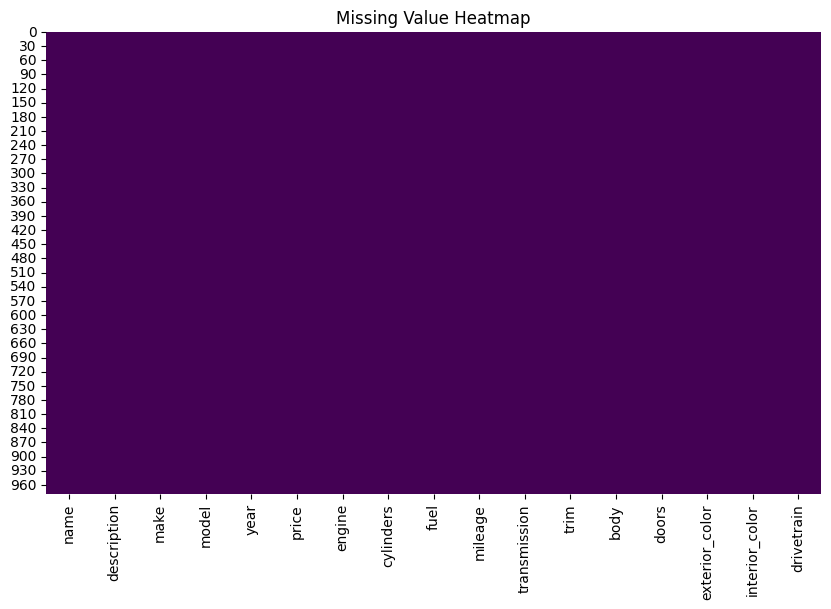

In [31]:
# Missing Values Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap="viridis")
plt.title("Missing Value Heatmap")
plt.show()

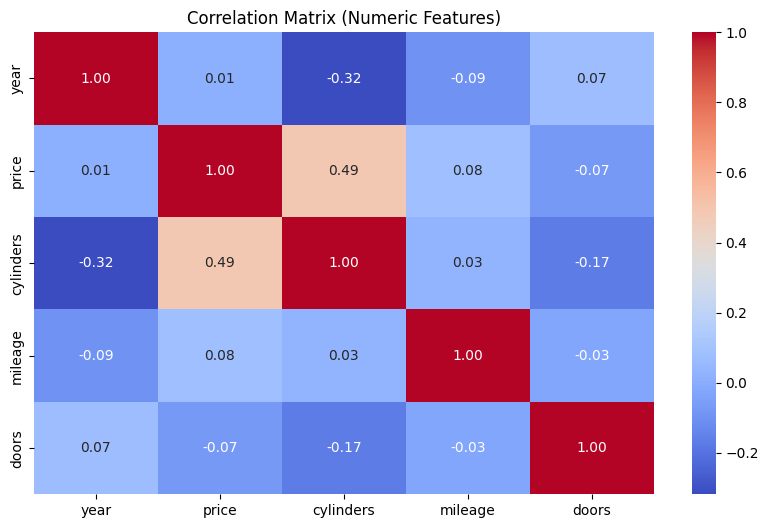

In [6]:
# Correlation Matrix
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix (Numeric Features)")
plt.show()

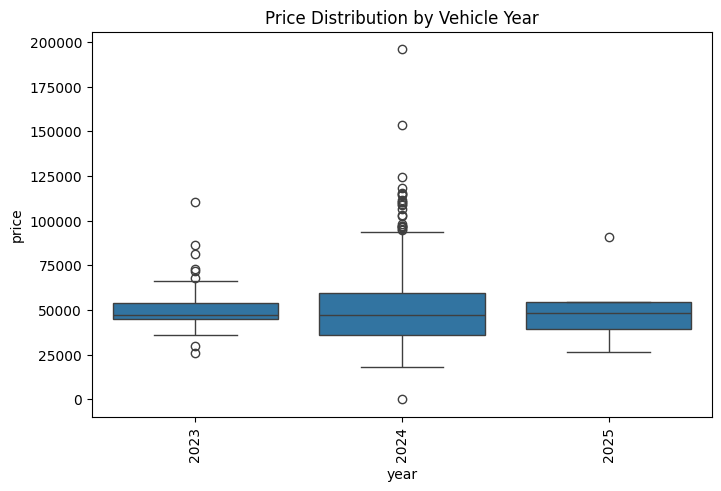

In [7]:
# Price vs Year
plt.figure(figsize=(8,5))
sns.boxplot(x="year", y="price", data=df)
plt.xticks(rotation=90)
plt.title("Price Distribution by Vehicle Year")
plt.show()

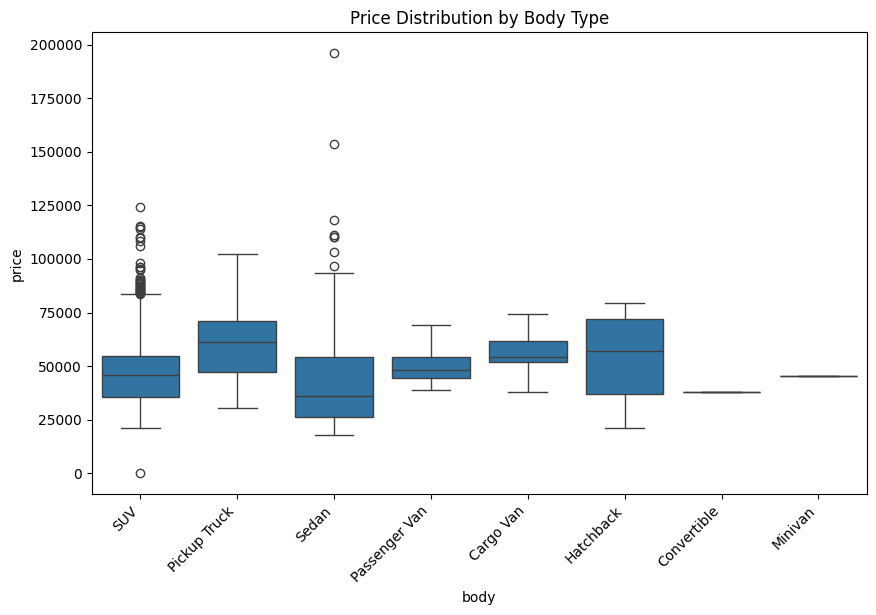

In [8]:
# Price vs Body type
plt.figure(figsize=(10,6))
sns.boxplot(x="body", y="price", data=df)
plt.xticks(rotation=45, ha="right")
plt.title("Price Distribution by Body Type")
plt.show()

In [9]:
# Data Handling and Cleaning
num_cols = ['year', 'cylinders', 'mileage', 'doors']
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = ['engine', 'fuel', 'transmission', 'trim',
            'body', 'exterior_color', 'interior_color', 'drivetrain']
df[cat_cols] = df[cat_cols].fillna("Unknown")

df["description"] = df["description"].fillna("")

print("Missing values after cleaning:")
print(df.isna().sum())

Missing values after cleaning:
name              0
description       0
make              0
model             0
year              0
price             0
engine            0
cylinders         0
fuel              0
mileage           0
transmission      0
trim              0
body              0
doors             0
exterior_color    0
interior_color    0
drivetrain        0
dtype: int64


In [11]:
# Data Splitting and Preprocessing
drop_cols = ['name', 'description']
df_model = df.drop(columns=drop_cols)

X = df_model.drop("price", axis=1)
y = df_model["price"]

num_cols = X.select_dtypes(include=["int64","float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

numeric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_pipe, num_cols),
    ("cat", categorical_pipe, cat_cols)
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(X_train, X_test, y_train, y_test)

              make             model  year                      engine  \
784         Subaru           Outback  2024                16V GDI DOHC   
910     Volkswagen              Taos  2024          16V GDI DOHC Turbo   
33             Kia               EV6  2024                           c   
31            Ford       Transit-250  2024  24V PDI DOHC Flexible Fuel   
731        Hyundai           IONIQ 6  2023                 c ZEV 320hp   
..             ...               ...   ...                         ...   
106      Chevrolet    Silverado 1500  2024                 16V GDI OHV   
270           Jeep  Grand Cherokee L  2024                         OHV   
860  Mercedes-Benz           GLA 250  2024          16V GDI DOHC Turbo   
435       Chrysler          Pacifica  2024               24V MPFI DOHC   
102      Chevrolet    Silverado 1500  2024          16V GDI DOHC Turbo   

     cylinders           fuel  mileage                       transmission  \
784        4.0       Gasoline     

Model         RMSE        R2
3           XGBoost  6969.487166  0.840945
0  LinearRegression  7445.538260  0.818475
2      RandomForest  8152.269116  0.782379
1      DecisionTree  9025.050633  0.733287

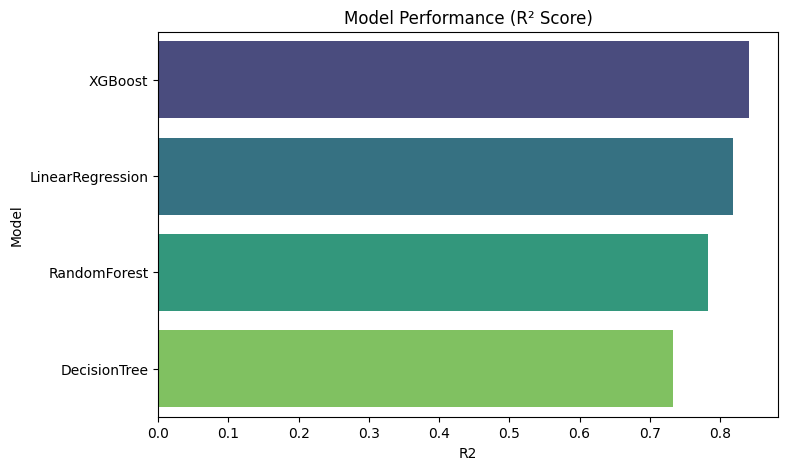

In [14]:
# Model Comparison, Training and Evaluation
models = {
    "LinearRegression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(random_state=42, n_estimators=200),
    "XGBoost": xgb.XGBRegressor(random_state=42, objective="reg:squarederror", n_estimators=300)
}

results = []

for name, model in models.items():
    pipe = Pipeline(steps=[("preprocess", preprocessor),
                           ("model", model)])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    results.append({"Model": name, "RMSE": rmse, "R2": r2})

results_df = pd.DataFrame(results).sort_values(by="R2", ascending=False)
display(results_df)

# Plot results
plt.figure(figsize=(8,5))
sns.barplot(x="R2", y="Model", data=results_df, hue="Model", dodge=False, palette="viridis", legend=False)
plt.title("Model Performance (R² Score)")
plt.show()

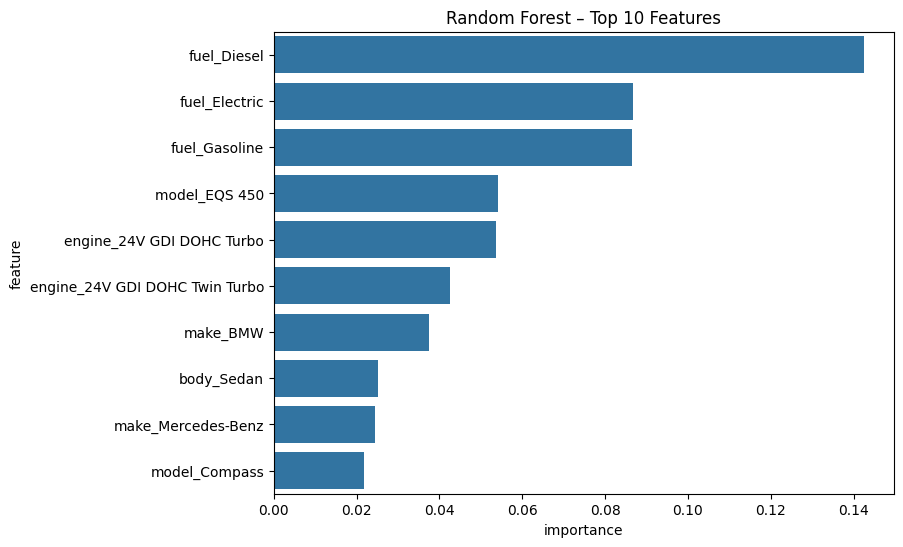

In [17]:
# Features Importance
xgb_pipe = Pipeline([
    ("preprocess", preprocessor),
    ("model", xgb.XGBRegressor(random_state=42, objective="reg:squarederror", n_estimators=300))
])

xgb_pipe.fit(X_train, y_train)

# Extract feature names
ohe_cols = xgb_pipe.named_steps["preprocess"].transformers_[1][1] \
    .named_steps["onehot"].get_feature_names_out(cat_cols)
all_features = num_cols + list(ohe_cols)

importances = xgb_pipe.named_steps["model"].feature_importances_
imp_df = pd.DataFrame({"feature": all_features, "importance": importances}) \
            .sort_values(by="importance", ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x="importance", y="feature", data=imp_df.head(10))
plt.title("Random Forest – Top 10 Features")
plt.show()

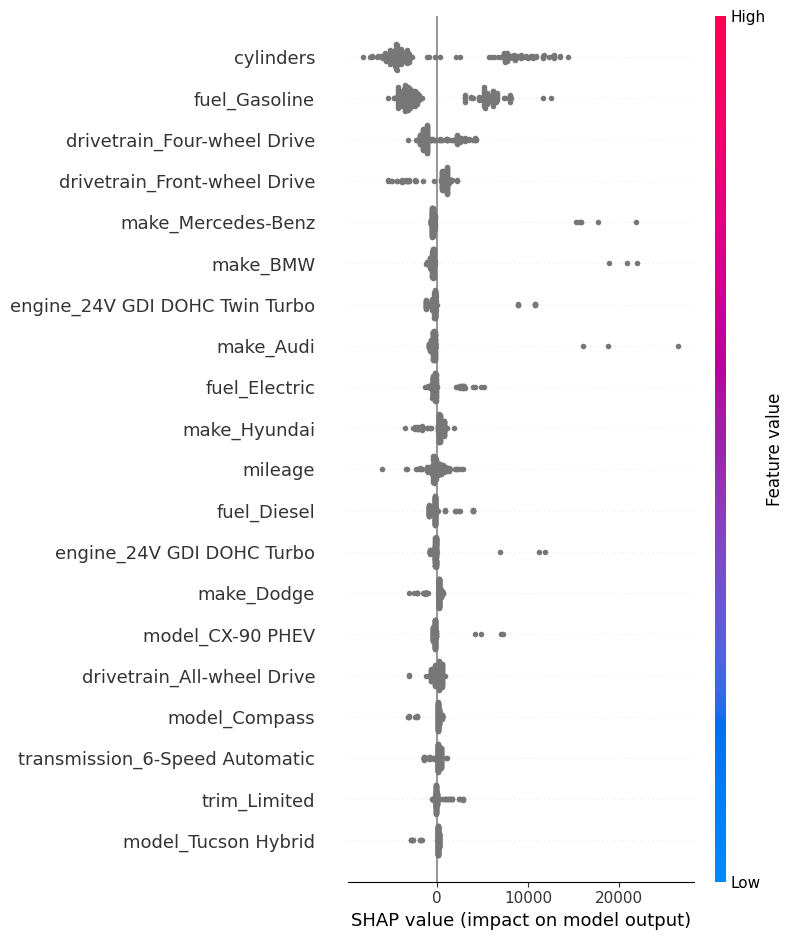

In [18]:
# SHAP Values
explainer = shap.Explainer(xgb_pipe.named_steps["model"])
shap_values = explainer(xgb_pipe.named_steps["preprocess"].transform(X_test)[:200])

shap.summary_plot(shap_values, feature_names=all_features)

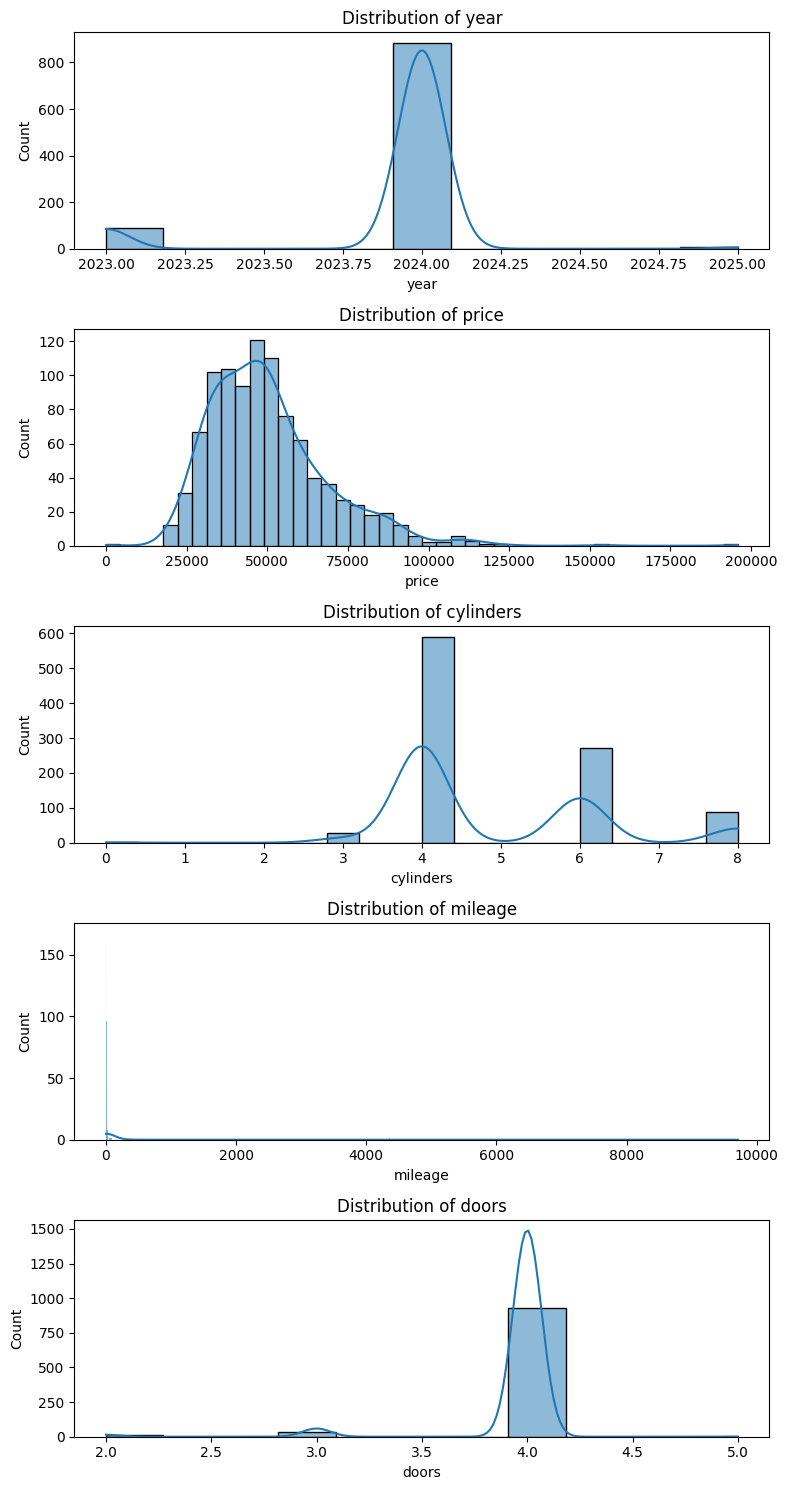

In [19]:
# Distributions of all numeric features
num_cols = df.select_dtypes(include=np.number).columns.tolist()

fig, axes = plt.subplots(len(num_cols), 1, figsize=(8, len(num_cols)*3))
for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

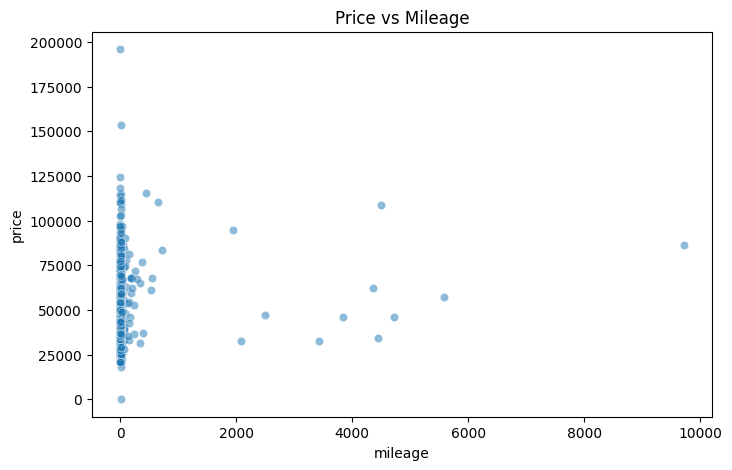

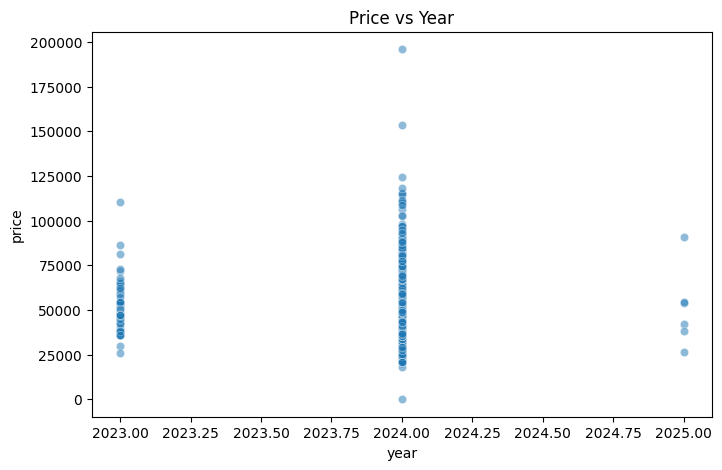

In [21]:
# Scatterplot
plt.figure(figsize=(8,5))
sns.scatterplot(x="mileage", y="price", data=df, alpha=0.5)
plt.title("Price vs Mileage")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x="year", y="price", data=df, alpha=0.5)
plt.title("Price vs Year")
plt.show()

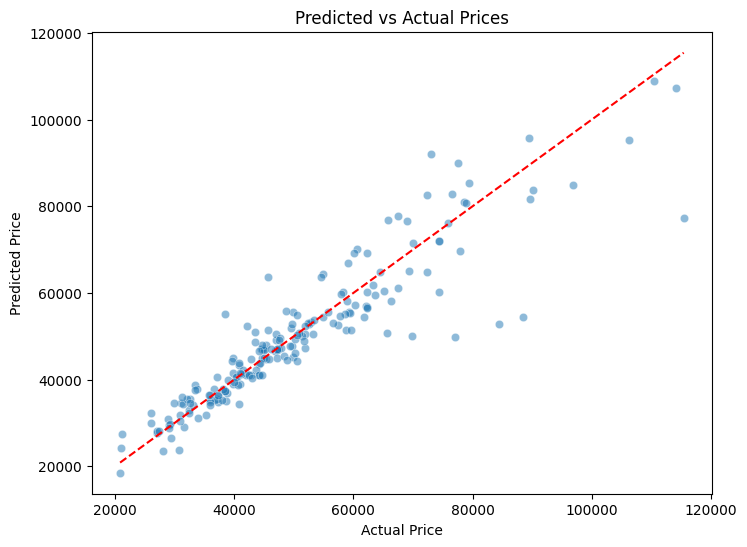

In [23]:
best_model = xgb_pipe
y_pred = best_model.predict(X_test)

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.title("Predicted vs Actual Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

In [29]:
# Saving the Model
joblib.dump(xgb_pipe, "../model/vehicle_price_dt.pkl")
print("XGBoost model saved as vehicle_price_dt.pkl")

XGBoost model saved as vehicle_price_dt.pkl
